# **Example 6.6.1 (Image captioning using pre-trained ViT)**

This example uses a pre-trained image captioning model to generate captions for images.

- Image captioning is a computer vision and natural language processing task that involves generating a textual description (caption) for an image.
- The goal is to automatically describe the content of an image in natural language, conveying relevant information about objects, scenes, actions, and other visual elements present in the image.
- Here the model employed for image captioning is the vit-gpt2-image-captioning model, made accessible through the Hugging Face library.

In [ ]:
# Installing Transformer Libraries
!pip install transformers

In [1]:
# Importing necessary libraries

# Importing the library for making HTTP requests
import requests
# Importing the torch library
import torch
# Importing the Python Imaging Library for image processing
from PIL import Image, ImageDraw, ImageFont
# Importing necessary modules from the transformers library
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast
# Importing the progress bar library
from tqdm import tqdm
# Importing the library for URL parsing
import urllib.parse as parse
# Importing the operating system library
import os

c:\envs\Deepbook\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Function to check if a string is a valid URL
def check_url(string):
    try:
        # Parsing the URL
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

In [3]:
# Function to load an image from either URL or local file system
def load_image(image_path):
    # Checking if the provided path is a URL
    if check_url(image_path):
         # Opening the image from URL
        return Image.open(requests.get(image_path, stream=True).raw)
    # Checking if the provided path exists in the local file system
    elif os.path.exists(image_path):
        # Opening the image from local file system
        return Image.open(image_path)
    else:
        # Raise an error if the image is not found
        raise FileNotFoundError("Image not found at the specified path.")

In [4]:
# Function to preprocess the loaded image
def preprocess_image(image, image_processor, device):
    # Preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    return img

In [5]:
# Function to generate caption for the image
def generate_caption(model, img, tokenizer):
    # Generate caption using the model
    output = model.generate(**img)
    # Decode the generated caption
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

In [6]:
# Function to save the image with caption
def save_image_with_caption(image, caption, save_path):
    # Get the dimensions of the image
    img_width, img_height = image.size
    # Create a blank grayscale image with space for caption
    blank_image = Image.new('L', (img_width, img_height + 50), (255))
    # Paste the original image onto the blank image
    blank_image.paste(image, (0, 0))
    # Font size for the caption
    font_size = 40
    # Load font for the caption
    caption_font = ImageFont.truetype("LiberationSans-Regular.ttf", font_size)
    # Create ImageDraw object
    draw = ImageDraw.Draw(blank_image)
    # Draw caption on the image
    draw.text((10, img_height), caption, font=caption_font, fill=(0))
    # Save the image with caption
    blank_image.save(save_path)

In [7]:
# Check for available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"



### Load Pre-trained Model, Tokenizer, and Image Processor:

This step involves loading pre-trained components required for image captioning.
- The VisionEncoderDecoderModel is the main model architecture responsible for encoding the image and decoding it to generate captions.
- The GPT2TokenizerFast is responsible for tokenizing text inputs and outputs for the model.
- The ViTImageProcessor preprocesses images before they are fed into the model for captioning.

These pre-trained components are essential as they provide the necessary architecture, vocabulary, and processing pipelines required for generating captions from images.

In [8]:
# Load pre-trained model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
# Load tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
# Load image processor
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")



c:\envs\Deepbook\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aswathyr\.cache\huggingface\hub\models--nlpconnect--vit-gpt2-image-captioning. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\envs\Deepbook\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_to

### Specify URL of the Image to Process:

- This step specifies the URL of the image that needs to be processed and captioned.
- The URL points to the location of the image on the web, allowing the script to access and download the image for processing.

In [11]:
# URL of the image to process
url = "https://images.pexels.com/photos/3061218/pexels-photo-3061218.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260"



In [12]:
# Load the image from the URL
image = load_image(url)
# Display the loaded image
image.show()



### Preprocess the Image:

- After loading the image, it needs to be preprocessed to prepare it for input to the model.
- Preprocessing typically involves resizing the image to a standard size, normalizing pixel values, and other transformations to make it suitable for the model's input format.
- The preprocess_image() function is responsible for applying these preprocessing steps to the loaded image.

In [13]:
# Preprocess the image
img = preprocess_image(image, image_processor, device)



### Generate Caption for the Image:

- Once the image is preprocessed, it is passed to the model to generate a caption.
- The model processes the image through its encoder-decoder architecture to understand the visual content and generate a corresponding textual description.
- The generate_caption() function executes this process, taking the preprocessed image along with the loaded model and tokenizer as inputs.

In [14]:
# Generate caption for the image
caption = generate_caption(model, img, tokenizer)



The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
c:\envs\Deepbook\Lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


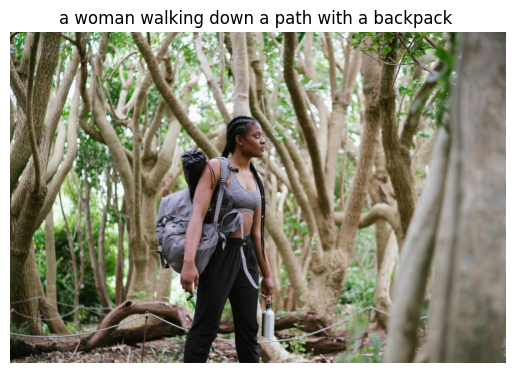

In [18]:
import matplotlib.pyplot as plt
# Define the path to save the image with caption
save_path = "image_with_caption.pdf"

# Define the function
def save_image_with_caption(image, caption, save_path):
    plt.imshow(image)
    plt.title(caption)
    plt.axis('off')
    plt.savefig(save_path)
    plt.show()
# Save the image with caption
save_image_with_caption(image, caption, save_path)
